In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Social_Network_Ads.csv")

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
x=data.iloc[:,2:3].values
y=data.iloc[:,4:5].values

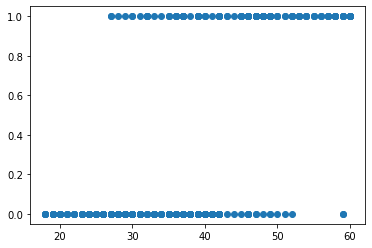

In [6]:
plt.scatter(x,y)

# Categorical Features

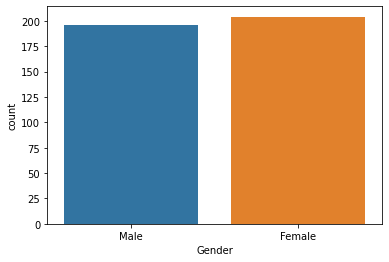

In [7]:
sns.countplot(data.Gender)

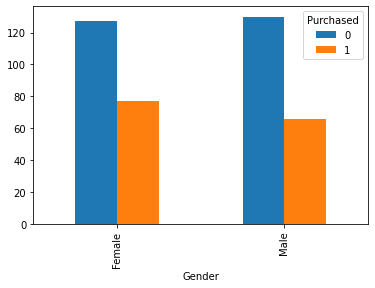

In [8]:
pd.crosstab(data.Gender,data.Purchased).plot(kind="bar")

In [9]:
data.drop('User ID',axis=1,inplace=True)

In [10]:
cat_features=data.iloc[:,0:1]

In [11]:
cat_features.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [13]:
ct=ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder='passthrough')

In [14]:
cat_gender=ct.fit_transform(cat_features)

In [15]:
cat_features=pd.DataFrame(cat_gender)
cat_features

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
395,1.0,0.0
396,0.0,1.0
397,1.0,0.0
398,0.0,1.0


# Numercial Features

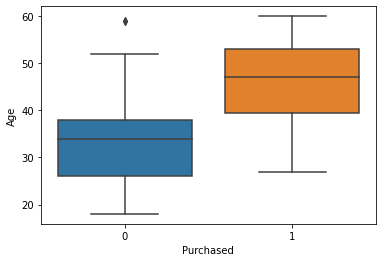

In [16]:
sns.boxplot(data['Purchased'],data['Age'])

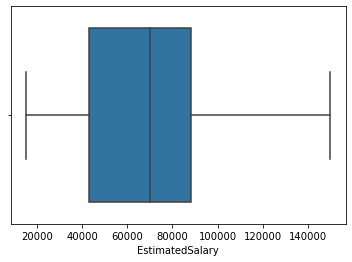

In [17]:
sns.boxplot(data['EstimatedSalary'])

In [18]:
num_features=data.iloc[:,1:3]
data_pp=pd.concat([cat_features,num_features],axis=1)

In [19]:
data_pp

,0,1,Age,EstimatedSalary
0,0.0,1.0,19,19000
1,0.0,1.0,35,20000
2,1.0,0.0,26,43000
3,1.0,0.0,27,57000
4,0.0,1.0,19,76000
...,...,...,...,...
395,1.0,0.0,46,41000
396,0.0,1.0,51,23000
397,1.0,0.0,50,20000
398,0.0,1.0,36,33000


In [20]:
x=data_pp.values
y=data.iloc[:,3].values

# Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss=StandardScaler()

In [25]:
x_train[:,2:]=ss.fit_transform(x_train[:,2:])
x_test[:,2:]=ss.transform(x_test[:,2:])

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [138]:
logistic_model=LogisticRegression(penalty='l2',C=0.045)

In [139]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=0.045)

In [140]:
y_pred=logistic_model.predict(x_test)

In [141]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625

In [143]:
accuracy_score(y_train,logistic_model.predict(x_train))

0.803125

In [144]:
from sklearn.metrics import confusion_matrix

In [145]:
confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 9, 19]], dtype=int64)

In [146]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).flatten()

# GridSearch CV

In [147]:
from sklearn.model_selection import GridSearchCV
lr1=LogisticRegression()

In [148]:
parameters={'C':np.linspace(0.2,0.6,50)}

In [149]:
gs=GridSearchCV(lr1,param_grid=parameters,cv=5,scoring='accuracy',n_jobs=-1,verbose=3)

In [150]:
gs.fit(x,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.2       , 0.20816327, 0.21632653, 0.2244898 , 0.23265306,
       0.24081633, 0.24897959, 0.25714286, 0.26530612, 0.27346939,
       0.28163265, 0.28979592, 0.29795918, 0.30612245, 0.31428571,
       0.32244898, 0.33061224, 0.33877551, 0.34693878, 0.35510204,
       0.36326531, 0.37142857, 0.37959184, 0.3877551 , 0.39591837,
       0.40408163, 0.4122449 , 0.42040816, 0.42857143, 0.43673469,
       0.44489796, 0.45306122, 0.46122449, 0.46938776, 0.47755102,
       0.48571429, 0.49387755, 0.50204082, 0.51020408, 0.51836735,
       0.52653061, 0.53469388, 0.54285714, 0.55102041, 0.55918367,
       0.56734694, 0.5755102 , 0.58367347, 0.59183673, 0.6       ])},
             scoring='accuracy', verbose=3)

In [151]:
gs.best_score_

0.64

In [152]:
gs.best_params_

{'C': 0.2}

# Real Time Prediction

In [153]:
rtp=[1,0,46,41000]

In [154]:
rtp=np.array([rtp])

In [155]:
rtp[:,2:]=ss.transform(rtp[:,2:])
rtp

array([[1, 0, 0, 0]])

In [156]:
logistic_model.predict(rtp)

array([0], dtype=int64)